In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%inline matplotlib

## Load the Data

In [2]:
df=pd.read_csv("M:/DataSets/LR.csv")

In [3]:
## size of the data
df.shape

(4238, 16)

In [4]:
## columns of the data
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
## data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
## how data looks like
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1692,0,49,1.0,0,0.0,0.0,0,0,0,225.0,115.5,72.5,21.83,69.0,NaN,1
745,0,66,1.0,0,0.0,0.0,0,1,0,232.0,175.0,94.0,29.84,95.0,67.0,1
1441,0,45,2.0,0,0.0,0.0,0,0,0,262.0,116.0,66.0,21.56,66.0,76.0,0
1529,0,43,2.0,1,20.0,0.0,0,0,0,195.0,104.0,57.0,20.86,75.0,78.0,0
3115,1,44,1.0,0,0.0,0.0,0,0,0,238.0,132.0,86.0,27.22,75.0,85.0,0


In [7]:
## missing values in the data
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
## stats of the data
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
## correlation of the data . TENYEARCHD is our outcome so find out correlations against it.
df.corr()['TenYearCHD']

male               0.088428
age                0.225256
education         -0.054059
currentSmoker      0.019456
cigsPerDay         0.057884
BPMeds             0.087489
prevalentStroke    0.061810
prevalentHyp       0.177603
diabetes           0.097317
totChol            0.082184
sysBP              0.216429
diaBP              0.145299
BMI                0.075192
heartRate          0.022913
glucose            0.125544
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

In [10]:
## check for duplicates : it signifies unique data ...
df.duplicated().sum()

0

In [11]:
## filling missing values...
df['education']=df['education'].fillna(1.0)
df.cigsPerDay=df.cigsPerDay.fillna(0.0)

In [12]:
# drop remaining values gulcose having so many outliers.
df=df.dropna()
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Exploratory Data Analysis(EDA)

<AxesSubplot:xlabel='education', ylabel='count'>

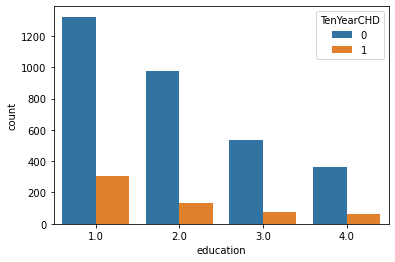

In [13]:
## education plot
sns.countplot(x="education",data=df,hue='TenYearCHD')

<AxesSubplot:xlabel='male', ylabel='count'>

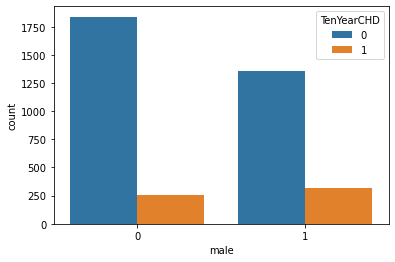

In [14]:
## males vs females 
sns.countplot(x="male",data=df,hue="TenYearCHD")

<AxesSubplot:xlabel='age', ylabel='count'>

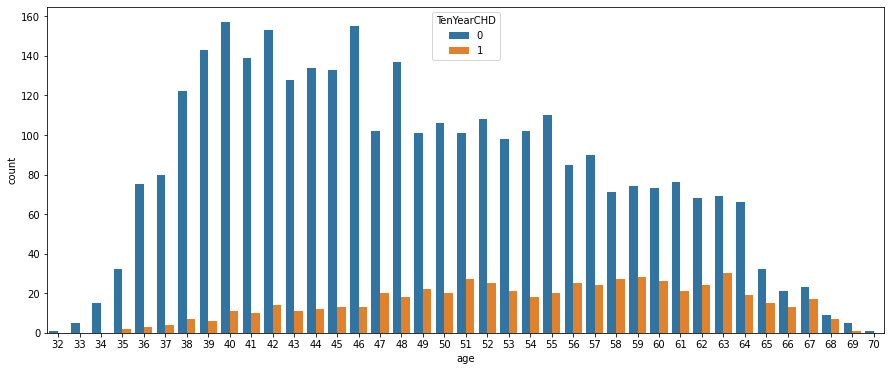

In [15]:
## age vs TenYearCHD ...
plt.figure(figsize=(15,6))
sns.countplot(x="age",data=df,hue="TenYearCHD")

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

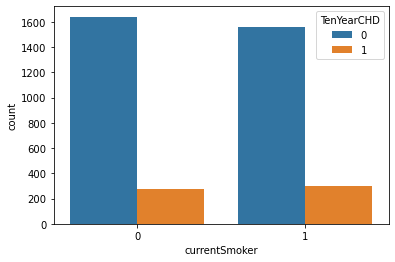

In [16]:
#smoker vs nonSmoker
sns.countplot(x="currentSmoker",data=df,hue="TenYearCHD")

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

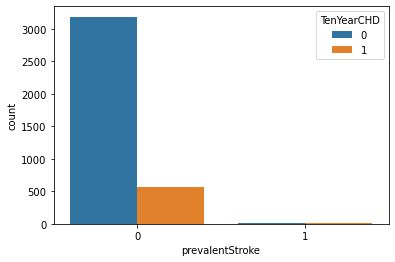

In [17]:
## prevalentStroke
sns.countplot(x="prevalentStroke",data=df,hue='TenYearCHD')

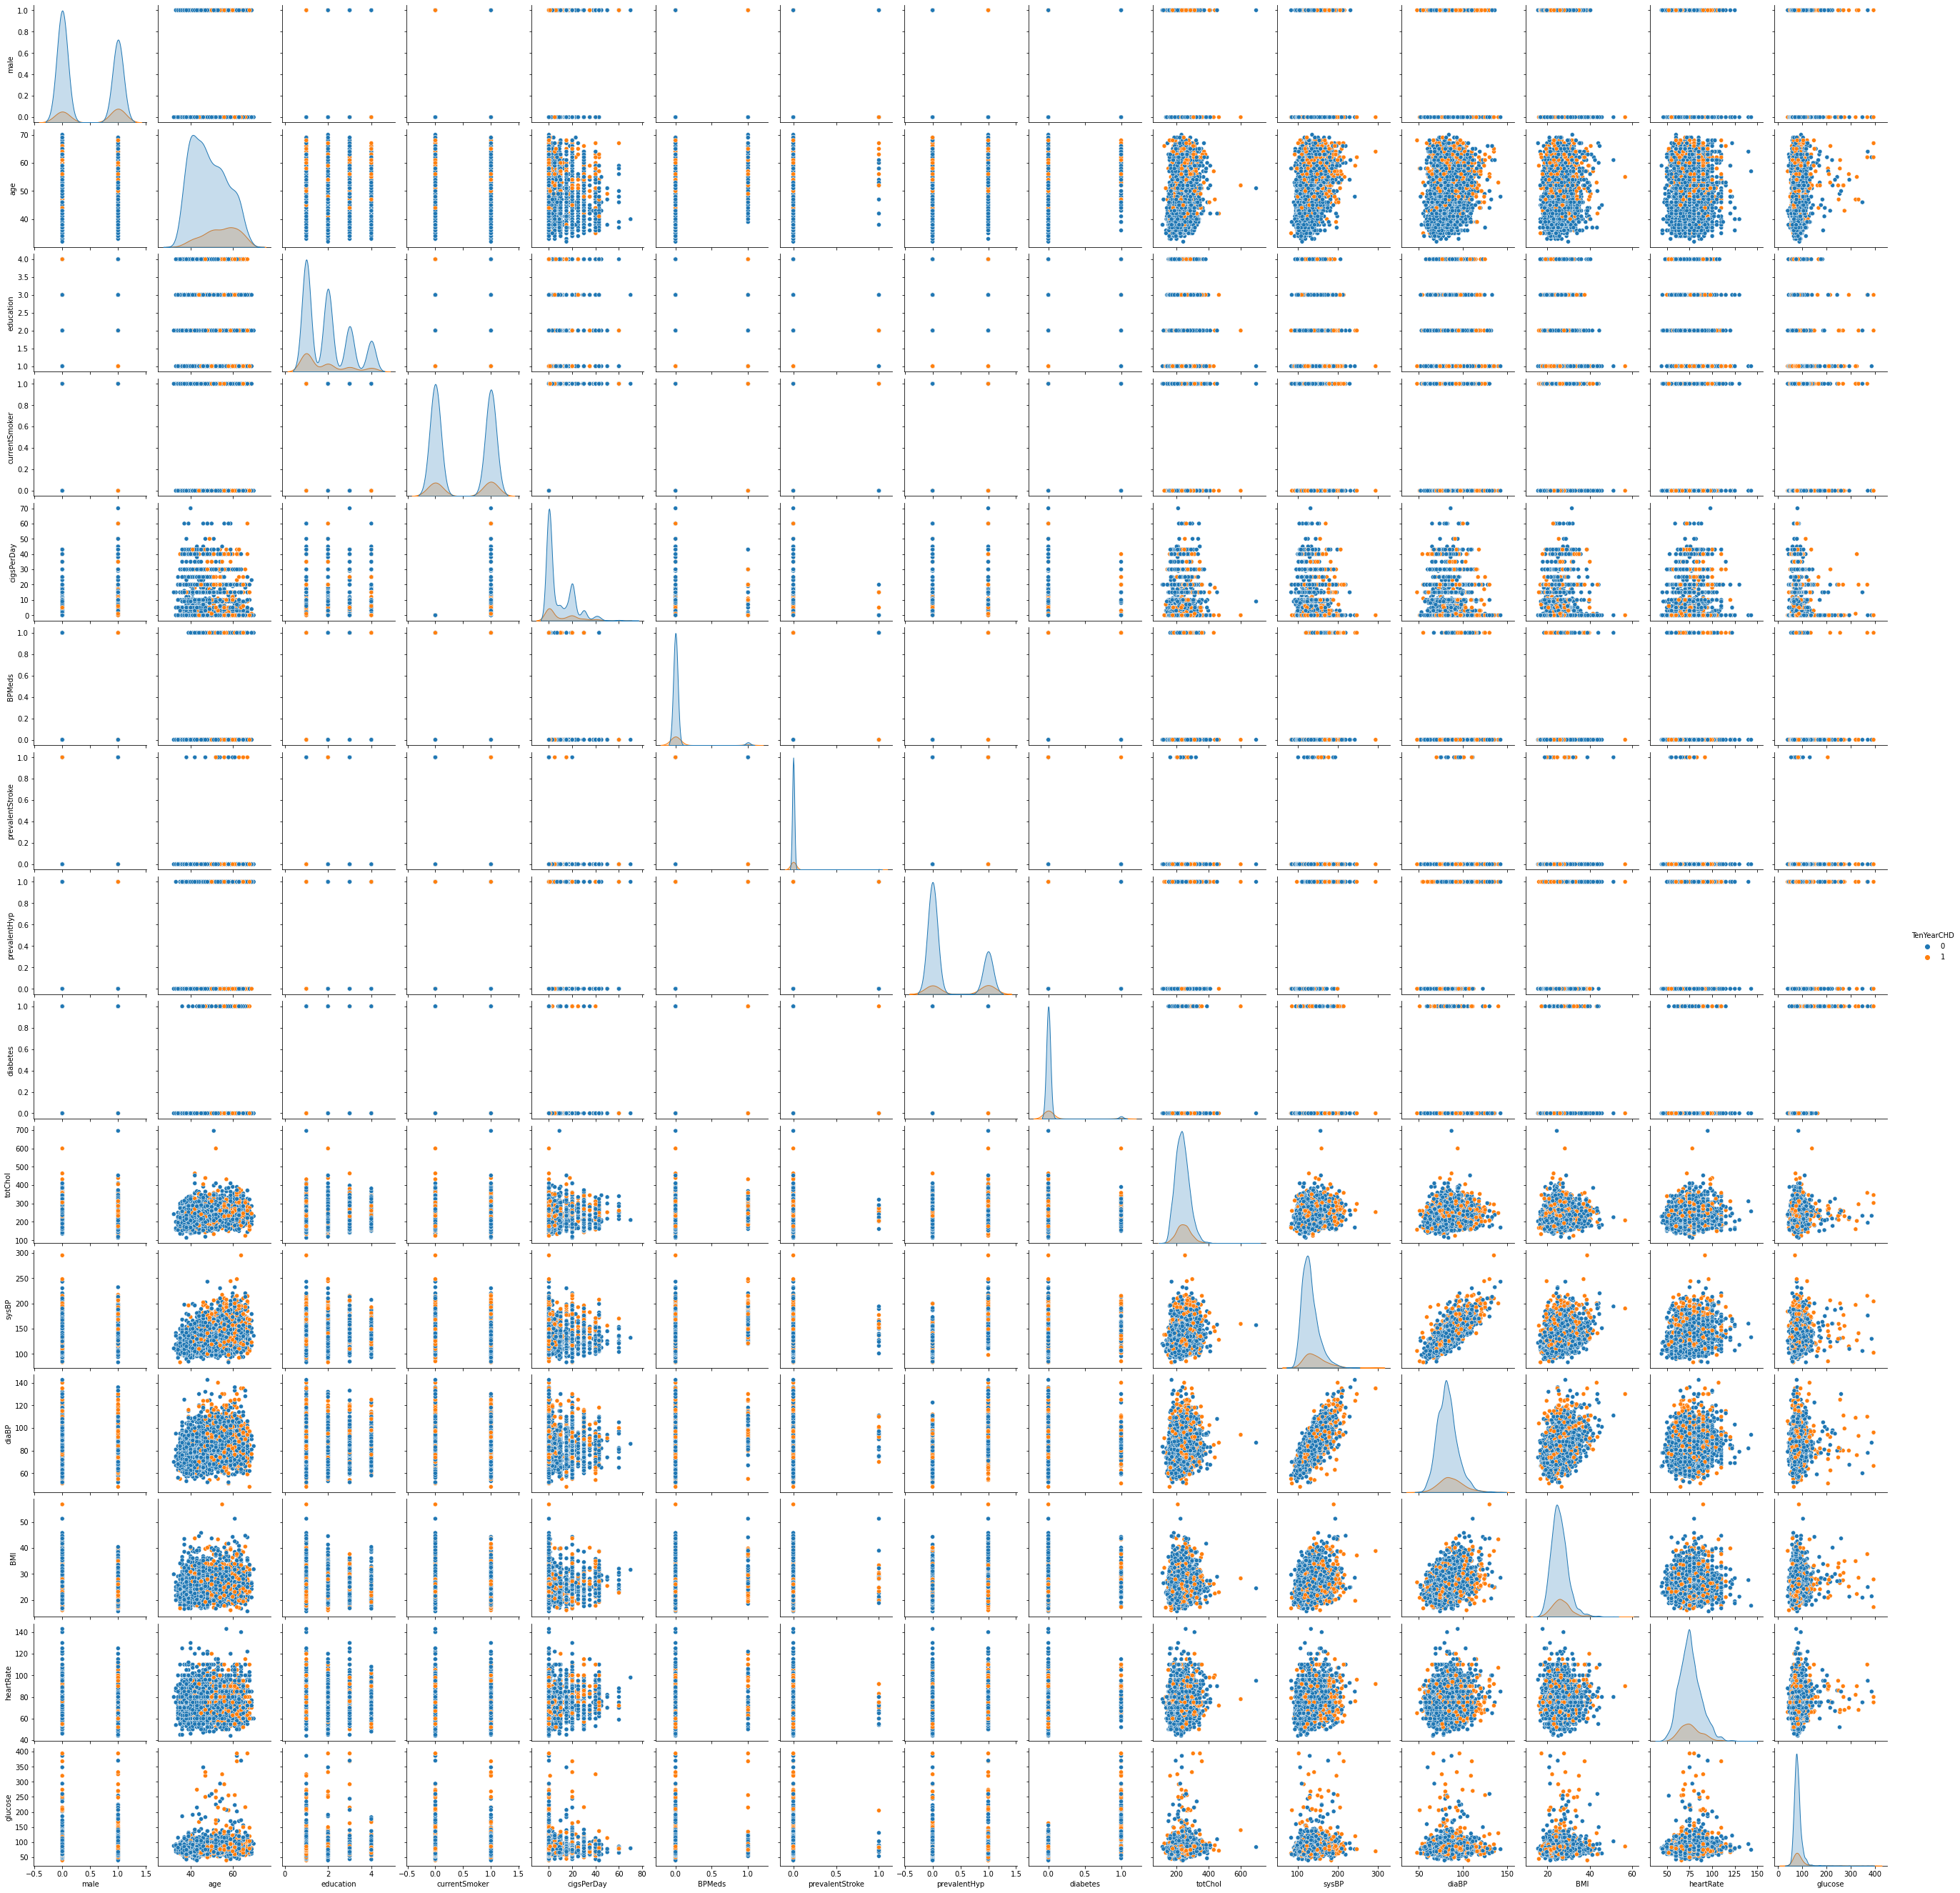

In [18]:
sns.pairplot(df,hue='TenYearCHD')

One needs to use multiple features to predict the TenYearCHD.

In [19]:
from statsmodels.tools import add_constant as add_constant
import statsmodels.api as sm
import scipy.stats as st
heart_df_constant = add_constant(df)
heart_df_constant.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [88]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(target,features)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.397363
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3774
Model:                          Logit   Df Residuals:                     3759
Method:                           MLE   Df Model:                           14
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                 0.06793
Time:                        19:14:29   Log-Likelihood:                -1499.6
converged:                       True   LL-Null:                       -1608.9
Covariance Type:            nonrobust   LLR p-value:                 8.573e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4189      0.103      4.072      0.000       0.217       0.621
x2             0.0274      0.006      4.784      0.000       0.016       0.039
x3            -0.1940      0.047     -4.085      0.000      -0.287      -0.101
x4            -0.2226      0.149     -1.497      0.134      -0.514       0.069
x5             0.0212      0.006      3.533      0.000       0.009       0.033
x6             0.3329      0.228      1.459      0.144      -0.114       0.780
x7             0.7287      0.483      1.508      0.132      -0.219       1.676
x8             0.9159      0.123      7.473      0.000       0.676       1.156
x9             0.7206      0.293      2.460      0.014       0.147       1.295
x10           -0.0010      0.001     -0.978      0.328      -0.003       0.001
x11            0.0124      0.004      3.306      0.001       0.005       0.020
x12           -0.0263      0.006     -4.342      0.000      -0.038      -0.014
x13           -0.0456      0.012     -3.766      0.000      -0.069      -0.022
x14           -0.0218      0.004     -5.556      0.000      -0.029      -0.014
x15            0.0022      0.002      1.070      0.285      -0.002       0.006
==============================================================================
"""

### Standardize using Standard Scaler

In [48]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df)
features=df.iloc[:,:-1]
target=df['TenYearCHD']

### Train_Test_split ...

In [49]:
from sklearn.model_selection import train_test_split
features=features.to_numpy()
target=target.to_numpy()
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=42,test_size=0.30,shuffle=True)

### Model Training

In [97]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2',solver='liblinear',multi_class='ovr')
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8553578190079515

### Model Evaluation

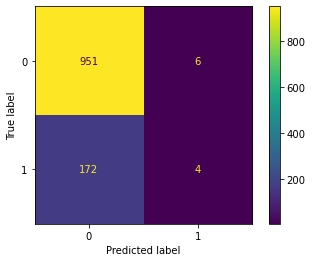

In [124]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_roc_curve
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(model, x_test, y_test) 

**False positives are high means in this case people who are safe from heart diseases are predicting as person will have heart disease** 

Theacuuracy of the model  =  0.8428949691085613 
 The Missclassification  0.15710503089143868 
 Sensitivity or True Positive Rate =  0.022727272727272728 
 Specificity or True Negative Rate   0.9937304075235109 
 Positive Predictive value  0.4 
 Negative predictive Value  0.8468388245770259 
 Positive Likelihood Ratio =  3.6249999999999813 
 Negative likelihood Ratio =  0.9834384858044165


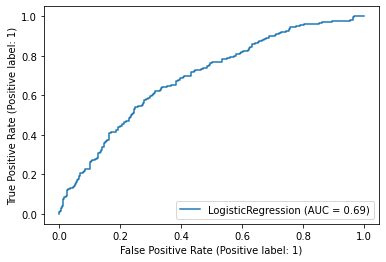

In [125]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
## accuray=(TP+TN/TP+TN+FP+FN)
## failure=1-accuracy
## TPR=TP/(TP+FN) Sensitivity...
## TNR=TN/(TP+FP) sepcifity...
print(
'Theacuuracy of the model  = ',(TP+TN)/float(TP+TN+FP+FN),
'\n','The Missclassification ',1-((TP+TN)/float(TP+TN+FP+FN)),
'\n','Sensitivity or True Positive Rate = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate  ',TN/float(TN+FP),'\n',
'Positive Predictive value ',TP/float(TP+FP),'\n',
'Negative predictive Value ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = ',sensitivity/(1-specificity),
'\n','Negative likelihood Ratio = ',(1-sensitivity)/specificity)
plot_roc_curve(model,x_test,y_test)  ## False positive rate=1-TNR

## observations ...
1. Model truely predicting the cases which are 0 means negitive . 
2. Model score(accuracy) are 85% neither good or bad model .
3. Every feature is having some priority,on eliminating some featues may helps to increase 
4. libslinear slover is used it is good when we are dealting small datasets, saga for large datsets and also yields fast results
5. Having stasmodel gives us intution to remove somes features whose P-Values are outside the accepting region.